In [1]:
import os
import geopandas as gpd
import pandas as pd
from google.colab import drive
from IPython.display import display
!pip install fiona


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.5 MB/s eta 0:00:00


In [2]:
from fiona import listlayers
drive.mount('/content/drive')
link_world_map = "/content/drive/My Drive/SHAPEFILE/MAPA6362.gpkg"

Mounted at /content/drive


In [3]:
listlayers(link_world_map)

['México',
 'Estados de México',
 'Municipios de México',
 'Ríos de México',
 'Estados_de_México',
 'Municipalidades_de_México',
 'aeropuerto',
 'Aereopuertos de Mexico',
 'aaeropuertointento']

In [4]:
print("Available layers in the GeoPackage:", gpd.list_layers)

Available layers in the GeoPackage: <function _list_layers at 0x7f519aeb7d80>


<Axes: >

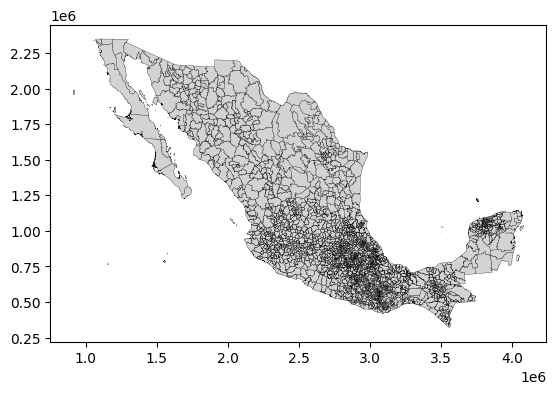

In [5]:
mexico_municipalities=gpd.read_file(link_world_map,layer='Municipalidades_de_México')
mexico_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [7]:
mexico_6362=gpd.read_file(link_world_map,layer='México')
mexico_6362.centroid

0        POINT (2479961.197 1322484.76)
1       POINT (1054278.241 2340947.608)
2       POINT (1057338.844 2338858.262)
3           POINT (1057555.381 2338052)
4        POINT (1058865.42 2336514.393)
                     ...               
1171     POINT (3491031.656 386459.875)
1172     POINT (3486859.524 385329.651)
1173     POINT (3486895.642 385807.171)
1174      POINT (3495912.76 384413.137)
1175     POINT (3496210.203 384214.099)
Length: 1176, dtype: geometry

In [8]:
mexico_6362.centroid.x.values[0],mexico_6362.centroid.y.values[0]

(np.float64(2479961.1971815787), np.float64(1322484.7597283402))

In [9]:
centroidX=mexico_6362.centroid.x.values[0]
centroidY=mexico_6362.centroid.y.values[0]

In [22]:
mun_mex_norte=mexico_municipalities.cx[:,centroidY:]
mun_mex_sur=mexico_municipalities.cx[:,:centroidY]
mun_mex_oeste=mexico_municipalities.cx[:centroidX,:]
mun_mex_este=mexico_municipalities.cx[centroidX:,:]

<Axes: >

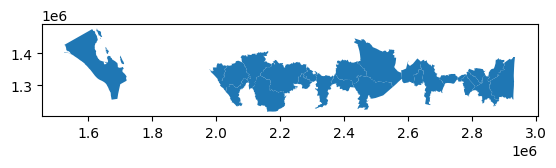

In [27]:
mun_NS_mex=mun_mex_norte.overlay(mun_mex_sur,how='intersection',keep_geom_type=True)
mun_NS_mex.plot()

<Axes: >

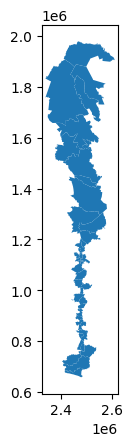

In [28]:
mun_EO_mex=mun_mex_este.overlay(mun_mex_oeste,how='intersection', keep_geom_type=True)
mun_EO_mex.plot()

In [29]:
mun_NS_mex.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CVEGEO_1     30 non-null     object  
 1   CVE_ENT_1    30 non-null     object  
 2   CVE_MUN_1    30 non-null     object  
 3   NOMGEO_1     30 non-null     object  
 4   NOM_ENT_1    30 non-null     object  
 5   COV__1       30 non-null     int64   
 6   COV_ID_1     30 non-null     int64   
 7   AREA_1       30 non-null     float64 
 8   PERIMETER_1  30 non-null     float64 
 9   CVEGEO_2     30 non-null     object  
 10  CVE_ENT_2    30 non-null     object  
 11  CVE_MUN_2    30 non-null     object  
 12  NOMGEO_2     30 non-null     object  
 13  NOM_ENT_2    30 non-null     object  
 14  COV__2       30 non-null     int64   
 15  COV_ID_2     30 non-null     int64   
 16  AREA_2       30 non-null     float64 
 17  PERIMETER_2  30 non-null     float64 
 18  geometry     30 non-null

In [30]:
mun_EO_mex.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CVEGEO_1     51 non-null     object  
 1   CVE_ENT_1    51 non-null     object  
 2   CVE_MUN_1    51 non-null     object  
 3   NOMGEO_1     51 non-null     object  
 4   NOM_ENT_1    51 non-null     object  
 5   COV__1       51 non-null     int64   
 6   COV_ID_1     51 non-null     int64   
 7   AREA_1       51 non-null     float64 
 8   PERIMETER_1  51 non-null     float64 
 9   CVEGEO_2     51 non-null     object  
 10  CVE_ENT_2    51 non-null     object  
 11  CVE_MUN_2    51 non-null     object  
 12  NOMGEO_2     51 non-null     object  
 13  NOM_ENT_2    51 non-null     object  
 14  COV__2       51 non-null     int64   
 15  COV_ID_2     51 non-null     int64   
 16  AREA_2       51 non-null     float64 
 17  PERIMETER_2  51 non-null     float64 
 18  geometry     51 non-null

In [31]:
keep=['CVE_ENT_1','CVE_MUN_1','CVE_ENT_2','CVE_MUN_2','geometry']

In [32]:
mun_NS_mex=mun_NS_mex.loc[:,keep]
mun_EO_mex=mun_EO_mex.loc[:,keep]

<Axes: >

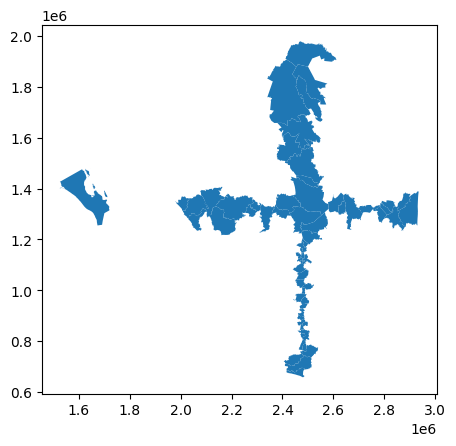

In [33]:
mun_NS_mex.overlay(mun_EO_mex,how='union',keep_geom_type=True).plot()

In [34]:
import pandas as pd
pd.concat([mun_NS_mex,mun_EO_mex],ignore_index=True)

CVE_ENT_1 CVE_MUN_1 CVE_ENT_2 CVE_MUN_2  \
0         03       001        03       003   
1         03       003        03       003   
2         10       005        10       005   
3         10       022        10       022   
4         10       023        10       023   
..       ...       ...       ...       ...   
76        32       051        32       051   
77        32       036        32       036   
78        32       016        32       016   
79        32       025        32       025   
80        32       027        32       027   

                                             geometry  
0   MULTIPOLYGON (((1611499.07 1475527.65, 1597513...  
1   MULTIPOLYGON (((1677352.421 1380615.829, 16773...  
2   POLYGON ((2191967.295 1374237.637, 2193590.83 ...  
3   POLYGON ((2285888.88 1358539.02, 2285924.15 13...  
4   POLYGON ((2148034.64 1323997.373, 2150696.465 ...  
..                                                ...  
76  POLYGON ((2444611.175 1330723.885, 2445047.111...  
77  POLYGON ((2479576.298 1191243.012, 2479737.913...  
78  POLYGON ((2482018.924 1201992.587, 2482374.023...  
79  POLYGON ((2476688.813 1166045.605, 2477034.03 ...  
80  POLYGON ((2473254.843 1453050.916, 2476156.701...  

[81 rows x 5 columns]

<Axes: >

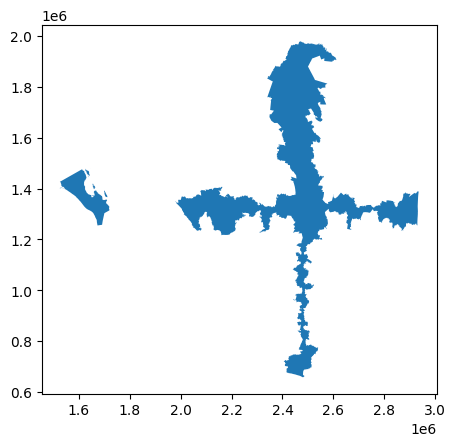

In [35]:
mun_NS_mex.overlay(mun_EO_mex,how='union',keep_geom_type=True).dissolve().plot()

In [36]:
municip_Mex=mun_NS_mex.overlay(mun_EO_mex,how='union',keep_geom_type=True).dissolve()
municip_Mex

geometry CVE_ENT_1_1 CVE_MUN_1_1  \
0  MULTIPOLYGON (((2050658.367 1245280.199, 20506...          32         026   

  CVE_ENT_2_1 CVE_MUN_2_1 CVE_ENT_1_2 CVE_MUN_1_2 CVE_ENT_2_2 CVE_MUN_2_2  
0          32         026          32         026          32         026

In [37]:
municip_Mex['zona']='middles'
municip_Mex=municip_Mex.loc[:,['CVE_ENT_1_1', 'zona', 'geometry']]
municip_Mex

CVE_ENT_1_1     zona                                           geometry
0          32  middles  MULTIPOLYGON (((2050658.367 1245280.199, 20506...

<Axes: >

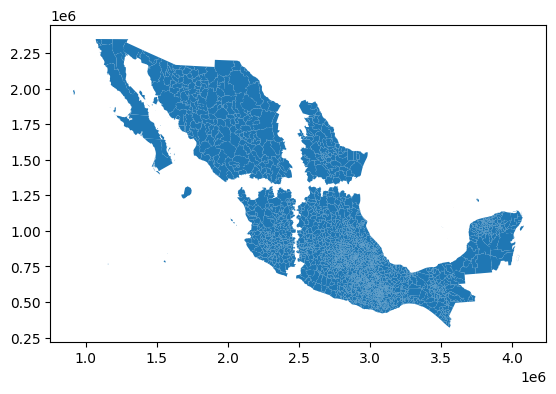

In [38]:
mexico_municipalities.overlay(municip_Mex,how='difference',keep_geom_type=True).plot()

<Axes: >

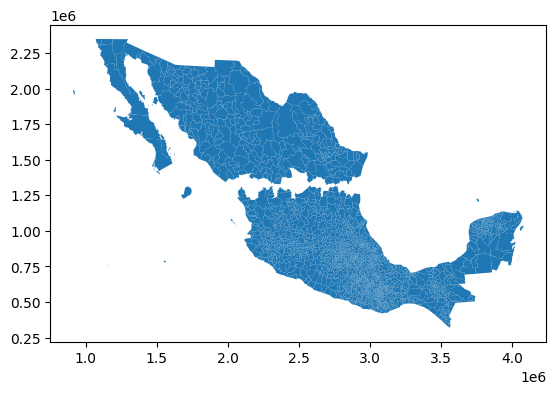

In [40]:
mun_mex_norte.overlay(mun_mex_sur,how="symmetric_difference",keep_geom_type=True).plot()

<Axes: >

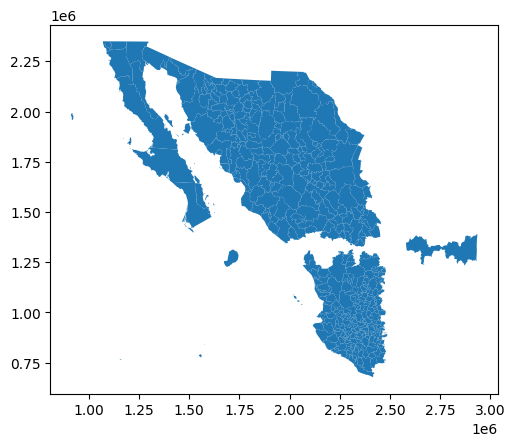

In [41]:
mun_mex_oeste.overlay(municip_Mex,how="symmetric_difference",keep_geom_type=False).plot()

In [61]:
mun_mex_sur_valid=mun_mex_sur.copy()
mun_mex_sur_valid.geometry=[make_valid(row)  if not row.is_valid else row for row in mun_mex_sur_valid['geometry'] ]
mun_mex_sur_valid[~mun_mex_sur_valid.is_valid]

Empty GeoDataFrame
Columns: [CVEGEO, CVE_ENT, CVE_MUN, NOMGEO, NOM_ENT, COV_, COV_ID, AREA, PERIMETER, geometry]
Index: []

In [62]:
pd.Series([type(x) for x in mun_mex_sur_valid.geometry]).value_counts()

<class 'shapely.geometry.multipolygon.MultiPolygon'>    2172
Name: count, dtype: int64

In [63]:
mun_mex_norte_valid=mun_mex_norte.copy()
mun_mex_este_valid=mun_mex_este.copy()
mun_mex_oeste_valid=mun_mex_oeste.copy()

In [64]:
mun_mex_norte_valid['geometry']=[make_valid(row)  if not row.is_valid else row for row in mun_mex_norte_valid['geometry'] ]
mun_mex_este_valid['geometry']=[make_valid(row)  if not row.is_valid else row for row in mun_mex_este_valid['geometry'] ]
mun_mex_oeste_valid['geometry']=[make_valid(row)  if not row.is_valid else row for row in mun_mex_oeste_valid['geometry'] ]

<Axes: >

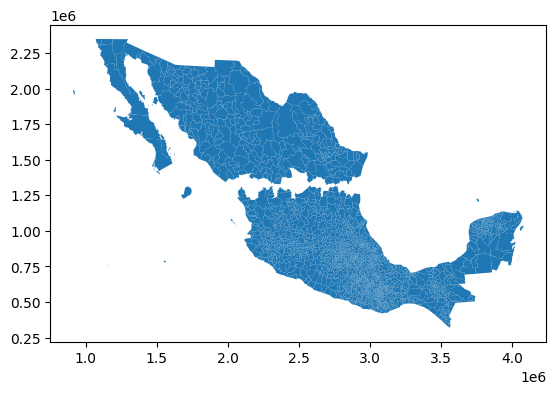

In [65]:
mun_mex_norte_valid.overlay(mun_mex_sur_valid,how="symmetric_difference",keep_geom_type=True).plot()

<Axes: >

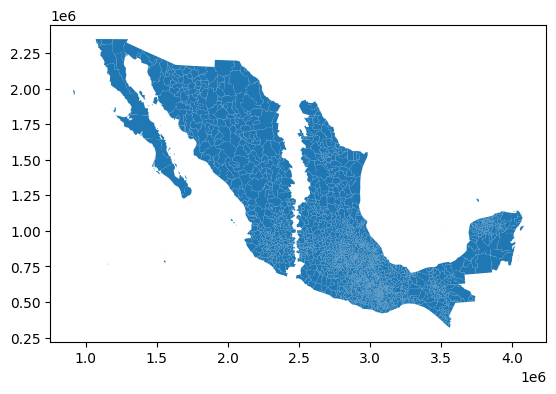

In [66]:
mun_mex_este_valid.overlay(mun_mex_oeste_valid,how="symmetric_difference",keep_geom_type=True).plot()

In [67]:
mun_mex_norte_clean=mun_mex_norte_valid.copy()
mun_mex_sur_clean=mun_mex_sur_valid.copy()
mun_mex_este_clean=mun_mex_este_valid.copy()
mun_mex_oeste_clean=mun_mex_oeste_valid.copy()

In [68]:
mun_mex_norte_clean['geometry']=mun_mex_norte_clean.geometry.buffer(0)
mun_mex_sur_clean['geometry']=mun_mex_sur_clean.geometry.buffer(0)
mun_mex_este_clean['geometry']=mun_mex_este_clean.geometry.buffer(0)
mun_mex_oeste_clean['geometry']=mun_mex_oeste_clean.geometry.buffer(0)

<Axes: >

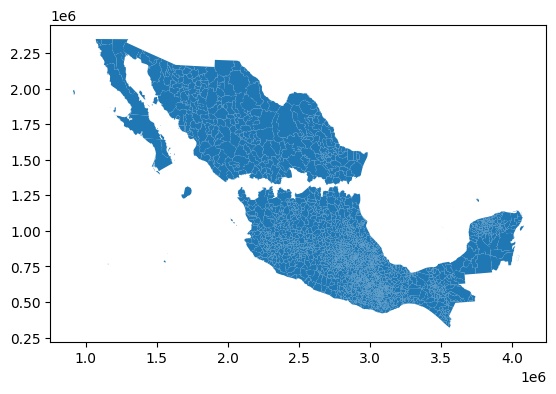

In [59]:
mun_mex_norte_clean.overlay(mun_mex_sur_clean,how="symmetric_difference",keep_geom_type=True).plot()

<Axes: >

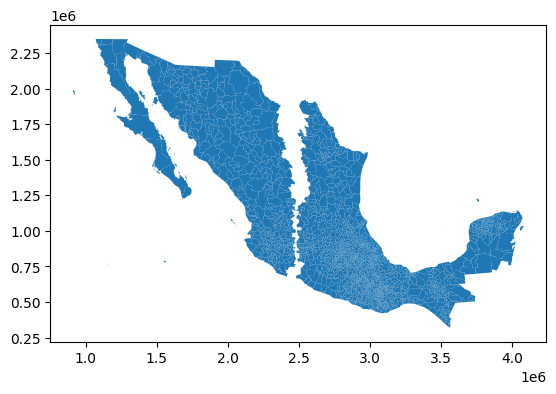

In [69]:
mun_mex_este_clean.overlay(mun_mex_oeste_clean,how="symmetric_difference",keep_geom_type=True).plot()